Importing required libraries

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Reading CSV file

In [24]:
stores_df = pd.read_csv("sample_data/Stores.csv")
stores_df = stores_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [25]:
stores_df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

Removing spaces from column names

In [26]:
stores_df.columns = stores_df.columns.str.strip()
stores_df.columns

Index(['Store ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

Checking for null values and duplicates

In [27]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [28]:
stores_df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [29]:
stores_df.duplicated().sum()

0

Getting details about store with maximum sales

In [30]:
stores_df.iloc[stores_df["Store_Sales"].idxmax()]

Store ID                   650
Store_Area                1989
Items_Available           2414
Daily_Customer_Count       860
Store_Sales             116320
Name: 649, dtype: int64

Getting details about store with minimum sales

In [31]:
stores_df.iloc[stores_df["Store_Sales"].idxmin()]

Store ID                   32
Store_Area               1250
Items_Available          1508
Daily_Customer_Count      990
Store_Sales             14920
Name: 31, dtype: int64

Removing StoreID column from the dataframe

In [33]:
stores_df.drop("Store ID", inplace = True, axis = "columns")

Descriptive stats for each variable

In [34]:
stores_df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


Correlation of store sales with other variables

In [35]:
stores_df.corr()["Store_Sales"].sort_values()

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

Paired plot

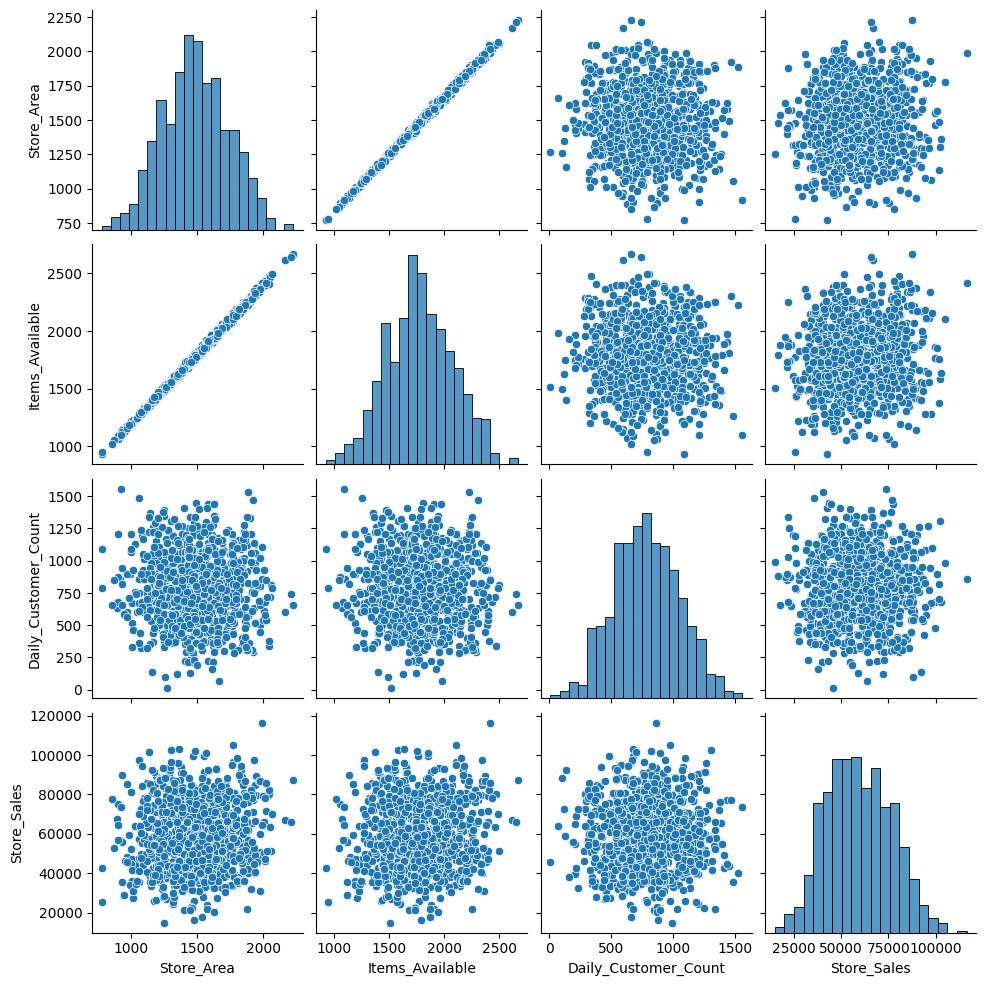

In [36]:
sns.pairplot(stores_df)
plt.show()

Distribution of store sales

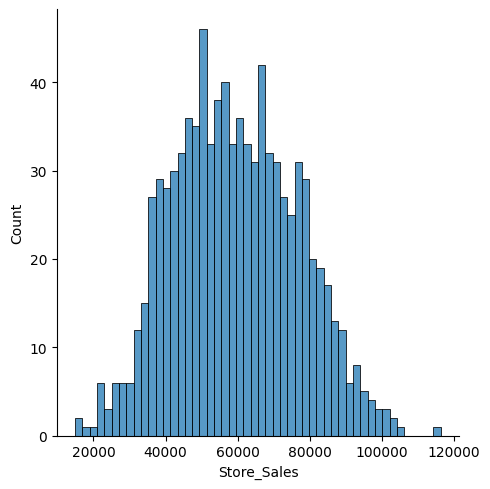

In [37]:
sns.displot(data = stores_df, x = "Store_Sales", bins = 50)
plt.show()

Identifying and removing outliers

In [38]:
IQR_Daily_Customer_Count = 970 - 600
upper_limit = 970 + 1.5 * IQR_Daily_Customer_Count
lower_limit = 600 - 1.5 * IQR_Daily_Customer_Count
stores_df.loc[stores_df["Daily_Customer_Count"] > upper_limit] = np.nan
stores_df.loc[stores_df["Daily_Customer_Count"] < lower_limit] = np.nan

In [39]:
stores_df.isnull().sum()

Store_Area              3
Items_Available         3
Daily_Customer_Count    3
Store_Sales             3
dtype: int64

In [40]:
stores_df.dropna(inplace = True)

Creating x and y variables for creating machine learning models

In [41]:
x = stores_df[["Store_Area", "Items_Available", "Daily_Customer_Count"]]
y = stores_df["Store_Sales"]

Splitting dataset for training and testing the machine learning models

In [42]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, random_state = 42, test_size = 0.3)

Standardizing x varibles in both training and testing datasets

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Creating function to calculate errors of machine learning models

In [45]:
def model_metrics(predictions):
  mae = mean_absolute_error(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)
  rmse = np.sqrt(mse)
  print(f"Mean absolute error of model: {mae}")
  print(f"Mean squared error of model: {mse}")
  print(f"Root mean squared error of model: {rmse}")

Creating linear regression model

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_x_train, y_train)
y_predictionlr = lr.predict(scaled_x_test)
model_metrics(y_predictionlr)

Mean absolute error of model: 13745.28249480692
Mean squared error of model: 277967390.55844456
Root mean squared error of model: 16672.354079686666


Creating support vector regression model

In [47]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(scaled_x_train, y_train)
y_predictionsvr = svr.predict(scaled_x_test)
model_metrics(y_predictionsvr)

Mean absolute error of model: 13718.238186940642
Mean squared error of model: 275359345.63366646
Root mean squared error of model: 16593.955093155655


Using GridSearchCV to find the best params for SVR model

In [48]:
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()
param_gridsvr = {"C":[0.001, 0.01, 0.1, 0.5], "kernel":["linear", "rbf", "poly"], "gamma":["auto", "scale"], "degree":[2, 3, 4, 5]}
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(scaled_x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [49]:
print(f"Best parameters of SVR model is {gridsvr.best_params_}")

Best parameters of SVR model is {'C': 0.5, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


In [50]:
preds_gridsvr = gridsvr.predict(scaled_x_test)
model_metrics(preds_gridsvr)

Mean absolute error of model: 13689.131768428255
Mean squared error of model: 274300443.5308729
Root mean squared error of model: 16562.01809958173


Creating random forest regression model

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(scaled_x_train, y_train)
pred_rfr = rfr.predict(scaled_x_test)
model_metrics(pred_rfr)

Mean absolute error of model: 14498.34328358209
Mean squared error of model: 325876738.7901492
Root mean squared error of model: 18052.05635904534


Using GridSearchCV to find the best params for random forest regression model

In [52]:
rfrmodel = RandomForestRegressor(max_features = 1.0)
params_gridrfr = {"bootstrap":[True], "max_depth":[5, 10, 15], "n_estimators":[2, 3, 4, 5, 6]}
gridrfr = GridSearchCV(rfrmodel, params_gridrfr)
gridrfr.fit(scaled_x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [53]:
print(f"Best parameters of random forest regression model is {gridrfr.best_params_}")

Best parameters of random forest regression model is {'bootstrap': True, 'max_depth': 5, 'n_estimators': 5}


In [54]:
preds_gridrfr = gridrfr.predict(scaled_x_test)
model_metrics(preds_gridrfr)

Mean absolute error of model: 14392.27161586788
Mean squared error of model: 317846724.80980307
Root mean squared error of model: 17828.25635921256
